<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02172019_1%5D_Keras_Titanic_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [0]:
import urllib.request
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

url='http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
filepath = '/content/gdrive/My Drive/Keras/titanic3.xls'
if not os.path.isfile(filepath):
  result=urllib.request.urlretrieve(url,filepath)
  print('download:',result)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy
import pandas as pd

In [0]:
all_df=pd.read_excel(filepath)

In [5]:
all_df[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df=all_df[cols]

In [7]:
all_df[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


In [0]:
# survived - 0:NO 1:YES
# pclass - 1:first 2:business 3:economy
# sibsp - number of wife, husband, siblings
# parch - number of parents, children
# embarked - C/Q/S

df=all_df.drop(['name'],axis=1)

In [9]:
df[:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [10]:
  all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [0]:
age_mean=df['age'].mean()
df['age']=df['age'].fillna(age_mean)

In [0]:
fare_mean=df['fare'].mean()
df['fare']=df['fare'].fillna(fare_mean)

In [0]:
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)

In [14]:
x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])
x_OneHot_df[:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,25.0000,1,2,151.5500,0,0,1


In [15]:
ndarray=x_OneHot_df.values
print(ndarray)

[[1. 1. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 3. 1. ... 1. 0. 0.]
 [0. 3. 1. ... 1. 0. 0.]
 [0. 3. 1. ... 0. 0. 1.]]


In [16]:
ndarray.shape

(1309, 10)

In [17]:
ndarray[:5]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   1.    ,   0.9167,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   1.    ,   0.    ,   2.    ,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   1.    ,   1.    ,  30.    ,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   1.    ,   0.    ,  25.    ,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ]])

In [0]:
Label = ndarray[:,0]
Features = ndarray[:,1:]

In [19]:
Label[:5]

array([1., 1., 0., 0., 0.])

In [20]:
Features[:5]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.    ,   2.    ,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,  30.    ,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.    ,  25.    ,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [0]:
from sklearn import preprocessing

In [0]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures=minmax_scale.fit_transform(Features)

In [23]:
scaledFeatures[:5]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.37369494, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.31106443, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [24]:
# Preprocess Summary
numpy.random.seed(10)
msk = numpy.random.rand(len(all_df))<0.8
print(msk)
print(all_df[:5])
train_df = all_df[msk]
test_df = all_df[~msk]

[ True  True  True ...  True  True  True]
   survived                                             name  pclass     sex  \
0         1                    Allen, Miss. Elisabeth Walton       1  female   
1         1                   Allison, Master. Hudson Trevor       1    male   
2         0                     Allison, Miss. Helen Loraine       1  female   
3         0             Allison, Mr. Hudson Joshua Creighton       1    male   
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1  female   

       age  sibsp  parch      fare embarked  
0  29.0000      0      0  211.3375        S  
1   0.9167      1      2  151.5500        S  
2   2.0000      1      2  151.5500        S  
3  30.0000      1      2  151.5500        S  
4  25.0000      1      2  151.5500        S  


In [25]:
print('total:',len(all_df),'train:',len(train_df),'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [0]:
def PreprocessData(raw_df):
  df=raw_df.drop(['name'],axis=1)
  age_mean=df['age'].mean()
  df['age']=df['age'].fillna(age_mean)
  fare_mean=df['fare'].mean()
  df['fare']=df['fare'].fillna(fare_mean)
  df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
  x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])
  ndarray=x_OneHot_df.values
  Label = ndarray[:,0]
  Features = ndarray[:,1:]
  
  minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
  scaledFeatures=minmax_scale.fit_transform(Features)
  
  return scaledFeatures,Label

train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label = PreprocessData(test_df)

# Model Construction

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()

In [29]:
model.add(Dense(units=40,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


# Training

In [0]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [32]:
train_history=model.fit(train_Features,train_Label,validation_split=0.1,epochs=30,batch_size=30,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6899 - acc: 0.5774 - val_loss: 0.6706 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6678 - acc: 0.5968 - val_loss: 0.5918 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6103 - acc: 0.6667 - val_loss: 0.4945 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5462 - acc: 0.7634 - val_loss: 0.4624 - val_acc: 0.7596
Epoch 5/30
 - 0s - loss: 0.5066 - acc: 0.7591 - val_loss: 0.4540 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4909 - acc: 0.7634 - val_loss: 0.4398 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4821 - acc: 0.7591 - val_loss: 0.4423 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4786 - acc: 0.7591 - val_loss: 0.4344 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.4730 - acc: 0.7634 - val_loss: 0.4276 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4695 - acc: 0.7774 - val_loss: 0.4255 - val_acc: 0.7981
Epoch 11/30
 - 0s - loss: 0.4654 - acc: 0.7634 - val_loss: 0.4223 - val_acc

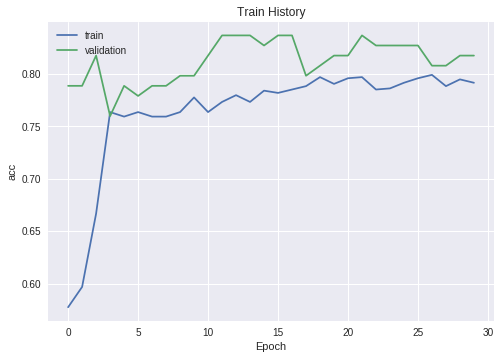

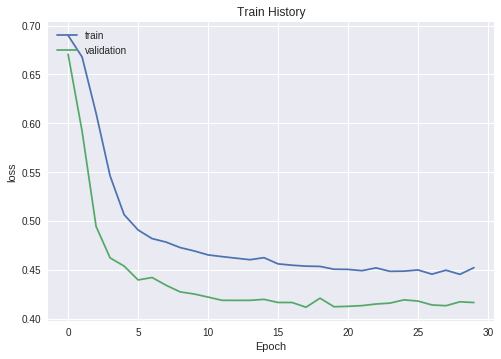

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

# Prediction

In [35]:
scores = model.evaluate(test_Features,test_Label)
scores[1]

275/275 [==============================] - 0s 81us/step


0.8109090913425793

In [0]:
Jack = pd.Series([0,'Jack',3,'male',23,1,0,5.0000,'S'])
Rose = pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])

In [0]:
JR_df=pd.DataFrame([list(Jack),list(Rose)],columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])

In [0]:
all_df=pd.concat([all_df,JR_df])

In [39]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [0]:
all_Features,Label=PreprocessData(all_df)

In [0]:
all_probability=model.predict(all_Features)

In [42]:
all_probability[:10]

array([[0.97684413],
       [0.61249447],
       [0.972198  ],
       [0.40797216],
       [0.97133696],
       [0.27127424],
       [0.95048106],
       [0.3258856 ],
       [0.9485353 ],
       [0.28959227]], dtype=float32)

In [0]:
pd=all_df
pd.insert(len(all_df.columns),'probability',all_probability)

In [46]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.151111
1,1,Rose,1,female,20.0,1,0,100.0,S,0.969567


In [51]:
pd[(pd['survived']==0)&(pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972198
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971337
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978579
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976815
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.964464


In [52]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976844
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.612494
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972198
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.407972
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971337
